In [78]:
import nltk as nltk
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.tokenize import TweetTokenizer, sent_tokenize

from nltk.sentiment import SentimentIntensityAnalyzer

In [79]:
df = pd.read_csv('master_utf8.csv')
stop_words = set(stopwords.words("english"))
sia = SentimentIntensityAnalyzer()

df['vader'] = np.nan

In [80]:
for i in range(len(df)):
    if not df['full_text'][i].startswith('RT'):
        text = df['full_text'][i]
        words_in_tweet = TweetTokenizer().tokenize(text)
        filtered_list = [word for word in words_in_tweet if word.casefold() not in stop_words]
        df.at[i, 'vader'] = sia.polarity_scores(text)['compound']
#    else:
#        text = df['rt_full_text'][i]
#        words_in_tweet = TweetTokenizer().tokenize(text)
#        filtered_list = [word for word in words_in_tweet if word.casefold() not in stop_words]
#        df.at[i, 'vader'] = sia.polarity_scores(text)['compound']

(array([ 2129.,  3338.,  3769.,  3290.,  1893., 14869.,  3078.,  3857.,
         3185.,  1631.]),
 array([-0.9991 , -0.80105, -0.603  , -0.40495, -0.2069 , -0.00885,
         0.1892 ,  0.38725,  0.5853 ,  0.78335,  0.9814 ]),
 <BarContainer object of 10 artists>)

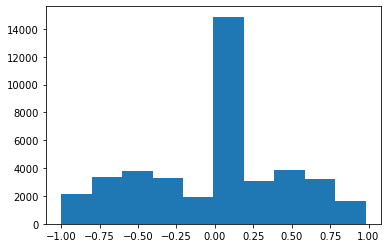

In [84]:
vaderdata = df['vader'].dropna()

plt.hist(vaderdata)

In [87]:
df.to_csv('final_vader.csv')